In [9]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np

In [67]:
df = pd.read_csv("customerprofiles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14825 non-null  object 
 1   age                                14825 non-null  int64  
 2   id                                 14825 non-null  object 
 3   became_member_on (year month day)  14825 non-null  int64  
 4   income                             14825 non-null  float64
 5   ever_married                       14825 non-null  object 
 6   kids                               14825 non-null  int64  
 7   home_state                         14825 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 926.7+ KB


In [74]:
df.head()

,age,id,became_member_on (year month day),income,ever_married,kids,home_state,Encoded Gender
0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota,0
1,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida,0
2,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida,0
3,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri,0
4,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Yes,5,South Dakota,0


In [5]:
dbscan = DBSCAN(eps=10, min_samples=5)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Adjust the path to where you've saved your dataset
df = pd.read_csv('/mnt/data/customerprofiles.csv')

# Convert directly convertible columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            continue

# Drop the 'id' column early to avoid processing it further
df.drop('id', axis=1, inplace=True)

# Use Label Encoding for remaining categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

# Impute missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

# This dataframe is now ready for DBSCAN
df_ready_for_dbscan = pd.DataFrame(scaled_features, columns=df.columns)

# Initialize DBSCAN and fit it to the prepared DataFrame
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_ready_for_dbscan)  # Adjusted as per the final request

# Add cluster labels to the DataFrame
df_ready_for_dbscan['clusters'] = dbscan.labels_

# Output the first few rows to verify changes
print(df_ready_for_dbscan.head())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/customerprofiles.csv'

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load your dataset
df = pd.read_csv('customerprofiles.csv')

# Convert directly convertible columns to numeric (e.g., 'income' if it's a string representing a float)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            continue

# For columns that are categorical (non-numeric strings), use Label Encoding or OneHot Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'id':  # Assuming 'id' should not be converted but removed or ignored
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        label_encoders[column] = label_encoder  # Store encoder if needed for inverse_transform

# Optionally, drop or ignore the 'id' column if it's not relevant for your analysis
df.drop('id', axis=1, inplace=True)

# Impute missing values if any
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
df_imputed['clusters'] = clusters

# Output the first few rows to verify changes
print(df_imputed.head())
predictions = dbscan.fit_predict(df)

   gender   age  became_member_on (year month day)    income  ever_married  \
0     0.0  55.0                         20170715.0  112000.0           0.0   
1     0.0  75.0                         20170509.0  100000.0           1.0   
2     1.0  68.0                         20180426.0   70000.0           1.0   
3     1.0  65.0                         20180209.0   53000.0           1.0   
4     1.0  58.0                         20171111.0   51000.0           1.0   

   kids  home_state  clusters  
0   3.0        33.0         0  
1   0.0         8.0         1  
2   3.0         8.0         2  
3   5.0        24.0       273  
4   5.0        40.0        -1  


In [6]:
predictions

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [7]:
df["Clusters"] = predictions

<Axes: xlabel='age', ylabel='income'>

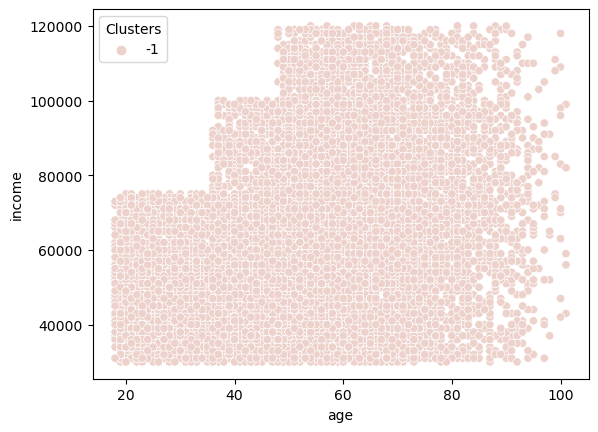

In [12]:
import seaborn as sns
sns.scatterplot(data=df, x="age", y="income", hue = "Clusters")

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
sScore = silhouette_score(df, predictions)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [25]:
sScore

NameError: name 'sScore' is not defined

In [63]:
def tuneParameters():
    models = {}
    for eps in range(1, 100):
        for samp in range(2, 20):
            dbscan = DBSCAN(eps=eps, min_samples=samp)
            dbscan.fit(df)
            predictions = dbscan.fit_predict(df)
            if len(set(predictions)) >= 3:
                sScore = silhouette_score(df, predictions)
                models[sScore] = [eps, samp]
    return models

In [64]:
scores = tuneParameters()

In [66]:
scores

{-0.4750261018077376: [3, 2],
 -0.5129803805751197: [4, 2],
 -0.46332473390800144: [5, 2],
 -0.31856218527186114: [5, 3],
 -0.2903488730555967: [6, 2],
 -0.44354214057007213: [6, 3],
 -0.3006169757847084: [6, 4],
 -0.17154201659875298: [7, 2],
 -0.3618564801217498: [7, 3],
 -0.3690724481247459: [7, 4],
 -0.09820011130907201: [8, 2],
 -0.2955904146783946: [8, 3],
 -0.33947506968887675: [8, 4],
 0.035986275223781214: [9, 2],
 -0.15311901741700493: [9, 3],
 -0.31799058434531036: [9, 4],
 -0.30413391128997397: [9, 5],
 0.09193371878515716: [10, 2],
 -0.024649715316340737: [10, 3],
 -0.06629112307990902: [10, 4],
 -0.2022924217015842: [10, 5],
 -0.28909858298513036: [10, 6],
 0.07650491465308297: [11, 2],
 -0.02882441838679009: [11, 3],
 -0.05593631396754103: [11, 4],
 -0.15957805790885207: [11, 5],
 -0.2808210665741959: [11, 6],
 0.06568243784704622: [12, 2],
 0.035130244918149416: [12, 3],
 -0.09427910172841104: [12, 4],
 -0.09874092586088432: [12, 5],
 -0.21720913495788913: [12, 6],
 -0.

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

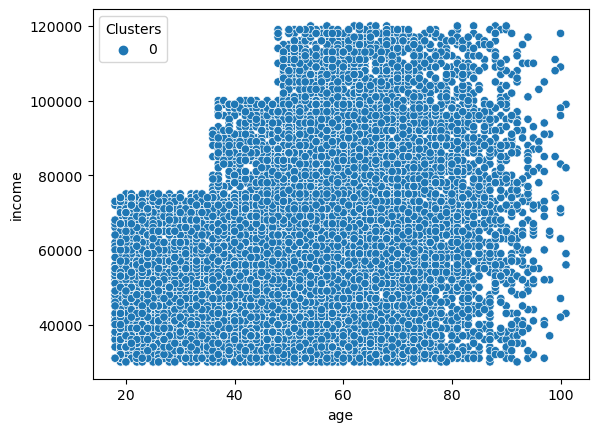

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("customer_profiles.csv")

# Encode gender: Female -> 0, Male -> 1
encodedGender = df['gender'].map({'F': 0, 'M': 1}).tolist()

df["Encoded Gender"] = encodedGender
df.drop(["gender"], axis=1, inplace=True)

# Select and scale relevant features for clustering
features_for_clustering = df[['age', 'income']].dropna()  # Assuming 'age' and 'income' are the features you want to cluster on
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Apply DBSCAN
dbscan = DBSCAN(eps=19, min_samples=4)
predictions = dbscan.fit_predict(scaled_features)

# Add cluster labels to the dataframe
features_for_clustering["Clusters"] = predictions

# Visualization
sns.scatterplot(data=features_for_clustering, x="age", y="income", hue="Clusters")

# Compute silhouette score
sScore = silhouette_score(scaled_features, predictions)

print(sScore)

# Parameter tuning function, adjusted for the scaled features
def tuneParameters(scaled_data):
    models = {}
    for eps in range(1, 100):
        for samp in range(2, 20):
            dbscan = DBSCAN(eps=eps, min_samples=samp)
            predictions = dbscan.fit_predict(scaled_data)
            if len(set(predictions)) - (1 if -1 in predictions else 0) >= 3:  # Ensure we have at least 3 clusters excluding noise
                sScore = silhouette_score(scaled_data, predictions)
                models[sScore] = [eps, samp]
    return models

scores = tuneParameters(scaled_features)

print(scores)
